<img src="https://i.postimg.cc/6pL3DKL5/hackathon.png" alt="flowchart">




1. ❗ [About Dataset](#about-dataset)  

2. ✅ [Architecture Diagram](#flowchart)

3. 🚩 [Data Preparation](#preparation)  

4. 🎚️ [Feature Engineering](#feature-engineering)  

5. 📊 [Feature Selection](#eda)  
   
6. 🧩 [Model](#model)   
  
  

## 1.❗Problem Statement
<a id="about-dataset"></a>

C&T Bank wants to identify and understand their customers better to determine the
appropriate credit amount to be offered based on multiple factors. The C&T bank
possesses a vast dataset containing customer information and other relevant
parameters. The C&T bank aims to develop a robust model that can accurately group
customer based on their creditworthiness.
This will enable the bank to make informed decisions about the credit amount to be
extended to each customer group, which can help mitigate risk, ensure responsible
lending practices, and optimize loan portfolio management. Additionally, the model
can assist the bank in identifying potential high-value customers, tailoring credit
offers based on risk profiles, and complying with regulatory requirements.
You have been given a percept of this dataset and the problem at hand is to create a
reliable model that can effectively categorize customers into three groups based on
various factors, enabling the bank to make data-driven decisions for credit lending
and risk management.
The data given is of credit records of individuals with certain attributes. Please go
through following to understand the variables involved:

## 2.✅ Architecture Diagram
<a id="flowchat"></a>

[link text](https://)<img src="https://i.postimg.cc/zfsn08JD/flowchart.png" alt="flowchart">

<a id="preparation"></a>
## 2. 🚩 Data Preparation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

In [ ]:
data = pd.read_csv('train.csv')


In [ ]:
total_missing_values = data.isnull().sum().sum()

if total_missing_values == 0:
    print("There are no missing values")
else:
    print("Total missing values:", total_missing_values)

Total missing values: 39


In [ ]:
data.set_index('sno', inplace=True)
data

,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
sno,,,,,,,,,,,,,,,,,,,,
1,A11,6,A34,A43,A65,A75,4.0,A93,A101,4,A121,67.0,A143,A152,2,A173,1,A192,A201,3
2,A12,48,A32,A43,A61,A73,2.0,A92,A101,2,A121,22.0,A143,A152,1,A173,1,A191,A201,1
3,A14,12,A34,A46,A61,A74,2.0,A93,A101,3,A121,49.0,A143,A152,1,A172,2,A191,A201,2
4,A11,42,A32,A42,A61,A74,2.0,A93,A103,4,A122,45.0,A143,A153,1,A173,2,A191,A201,1
5,A11,24,A33,A40,A61,A73,3.0,A93,A101,4,A124,53.0,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,A14,9,A32,A42,A62,A72,2.0,A92,A101,4,A122,22.0,A143,A151,1,A173,1,A191,A201,2
797,A11,18,A32,A41,A65,A75,1.0,A93,A101,4,A122,51.0,A143,A153,1,A173,2,A192,A201,1
798,A14,12,A34,A42,A61,A72,2.0,A92,A101,4,A122,22.0,A143,A151,2,A172,1,A191,A201,3


<a id="feature-engineering"></a>
## 3.🧹 Feature Engineering

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

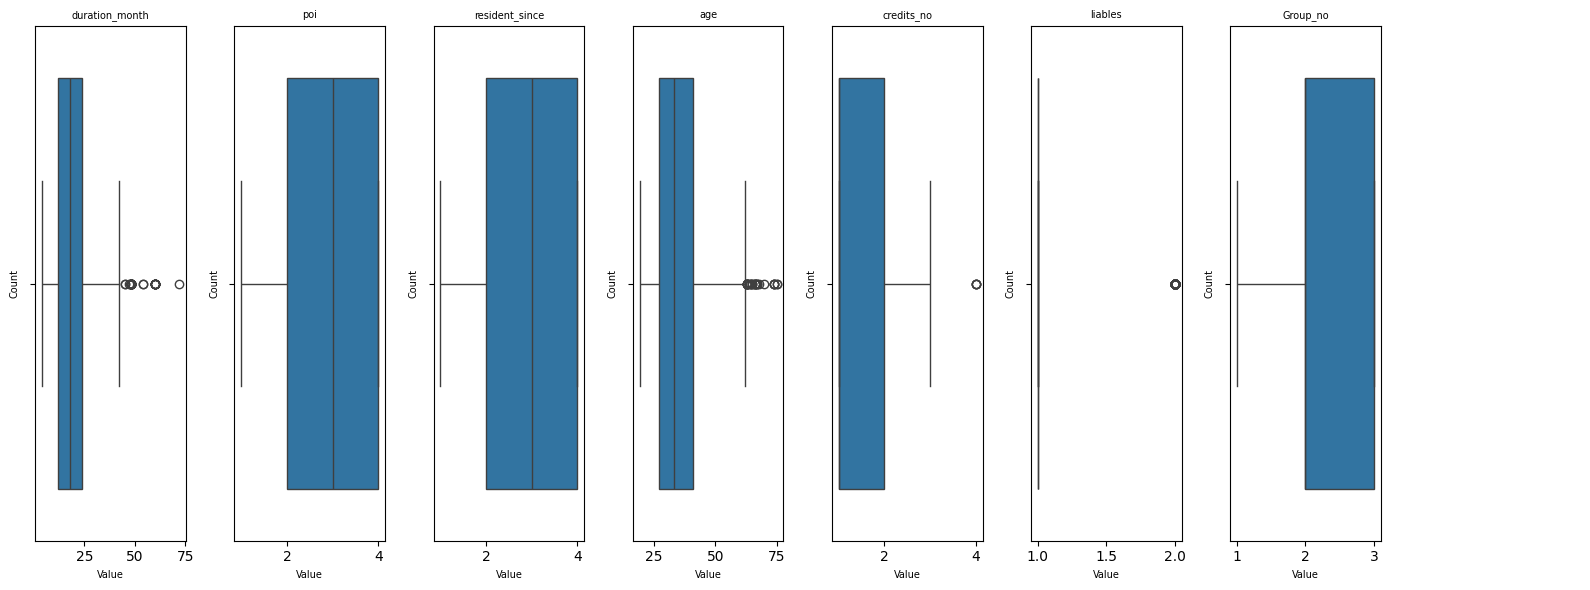

In [ ]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Some outliers are way beyond Standard deviation,so we have to choose right scaling for the model**

**Scaling**

In [ ]:
data = data[data['duration_month'] < 72]

In [ ]:
y = data['Group_no']
x = data.drop(columns=['Group_no'])

**Encoding**

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()


Converting Categorical values into numerical and filling the null values by simple imputer

In [ ]:
for col in categorical_cols:
        if x[col].notnull().all():
            label_encoder = LabelEncoder()
            x[col] = label_encoder.fit_transform(x[col])
        else:
            imputer = SimpleImputer(strategy='most_frequent')
            x[col] = imputer.fit_transform(x[[col]]).ravel()
            label_encoder = LabelEncoder()
            x[col] = label_encoder.fit_transform(x[col])

x.head(5)

,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
sno,,,,,,,,,,,,,,,,,,,
1,0,6,4,4,4,4,4.0,2,0,4,0,67.0,2,1,2,2,1,1,0
2,1,48,2,4,0,2,2.0,1,0,2,0,22.0,2,1,1,2,1,0,0
3,3,12,4,7,0,3,2.0,2,0,3,0,49.0,2,1,1,1,2,0,0
4,0,42,2,3,0,3,2.0,2,2,4,1,45.0,2,2,1,2,2,0,0
5,0,24,3,0,0,2,3.0,2,0,4,3,53.0,2,2,2,2,2,0,0


Using Mean strategy for Numerical imputer

In [ ]:
imp = SimpleImputer(strategy='mean')
x['age'] = imp.fit_transform(x['age'].values.reshape(-1, 1) )
x['poi'] = imp.fit_transform(x['poi'].values.reshape(-1, 1) )

In [ ]:
columns_with_missing_values = x.columns[x.isnull().any()]
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
Index([], dtype='object')


<a id="eda"></a>
## 4. 📊 Feature Selection

**5.1 Chi-squared test**

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
chi2_selector = SelectKBest(chi2,k=19)
X_kbest = chi2_selector.fit_transform(x, y)

In [ ]:
p_values=pd.Series(X_kbest[0])
p_values.index=x.columns
p_values.sort_values(ascending=False)

age                 67.0
duration_month       6.0
resident_since       4.0
credit_history       4.0
purpose              4.0
savings_acc          4.0
employment_st        4.0
poi                  4.0
job_type             2.0
personal_status      2.0
installment_type     2.0
credits_no           2.0
telephone            1.0
liables              1.0
housing_type         1.0
acc_info             0.0
property_type        0.0
gurantors            0.0
foreigner            0.0
dtype: float64

**5.2 Mutual Information Score**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

data_encoded = data.copy()

encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])



mi_scores = mutual_info_classif(x, y)

for i, score in enumerate(mi_scores):
    print(f"Feature '{x.columns[i]}': Mutual Information Score = {score}")

Feature 'acc_info': Mutual Information Score = 0.010109410464866242
Feature 'duration_month': Mutual Information Score = 0.2100152141530247
Feature 'credit_history': Mutual Information Score = 0.027602390680986577
Feature 'purpose': Mutual Information Score = 0.04906733419025944
Feature 'savings_acc': Mutual Information Score = 0.01728575258681664
Feature 'employment_st': Mutual Information Score = 0.0
Feature 'poi': Mutual Information Score = 0.03898646736845768
Feature 'personal_status': Mutual Information Score = 0.02352427305315241
Feature 'gurantors': Mutual Information Score = 0.0
Feature 'resident_since': Mutual Information Score = 0.0
Feature 'property_type': Mutual Information Score = 0.01197835634809885
Feature 'age': Mutual Information Score = 0.0006850773431104074
Feature 'installment_type': Mutual Information Score = 0.0
Feature 'housing_type': Mutual Information Score = 0.029744022553149563
Feature 'credits_no': Mutual Information Score = 0.002087750737967742
Feature 'job

In [ ]:
sorted_mi_scores = sorted(zip(x.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

colorscale = 'Viridis'

fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Mutual Information Score', len=0.5, y=0.2)))])

fig.update_layout(title='Mutual Information Scores for Each Feature',
                  xaxis_title='Features',
                  yaxis_title='Mutual Information Score')

fig.show()

**Dropping low related features**

By observing both Chi2 test and MI scores we drop relatively low scores

In [ ]:
columns_to_drop = ['gurantors','foreigner','acc_info','liables']
x.drop(columns=columns_to_drop, inplace=True)

In [ ]:
x

,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,telephone
sno,,,,,,,,,,,,,,,,
1,6,4,4,4,4,4.0,2,0,4,0,67.0,2,1,2,2,1
2,48,2,4,0,2,2.0,1,0,2,0,22.0,2,1,1,2,0
3,12,4,7,0,3,2.0,2,0,3,0,49.0,2,1,1,1,0
4,42,2,3,0,3,2.0,2,2,4,1,45.0,2,2,1,2,0
5,24,3,0,0,2,3.0,2,0,4,3,53.0,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,9,2,3,1,1,2.0,1,0,4,1,22.0,2,0,1,2,0
797,18,2,1,4,4,1.0,2,0,4,1,51.0,2,2,1,2,1
798,12,4,3,0,1,2.0,1,0,4,1,22.0,2,0,2,1,0


## 5. 🧩 Model
<a id="model"></a>

**5.1 Smote**

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote_params = {
    'sampling_strategy': 'auto',
    'random_state': 77,
    'k_neighbors': 3,
    'n_jobs': -1
}

smote = SMOTE(**smote_params)

In [ ]:
X_train = x
y_train = y

X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=77)

C:\Users\Caxy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning:

The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.



**5.2 RandomForestClassifier**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_params={"n_estimators": 150,"criterion":'log_loss',"max_samples":750}
rf_classifier = RandomForestClassifier(**rf_params, bootstrap=True)
rf_classifier.fit(X_train_smote, y_train_smote)


y_pred_smote = rf_classifier.predict(X_test_smote)
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)

print("Accuracy on SMOTE test set:", accuracy_smote)

Accuracy on SMOTE test set: 0.8113207547169812


In [ ]:
print(classification_report(y_test_smote,y_pred_smote))


              precision    recall  f1-score   support

           1       0.86      0.90      0.88        67
           2       0.83      0.64      0.73        70
           3       0.76      0.89      0.82        75

    accuracy                           0.81       212
   macro avg       0.82      0.81      0.81       212
weighted avg       0.82      0.81      0.81       212

